In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.linear_model import LassoCV
#from sklearn.linear_model import RidgeCV

data = pd.read_csv('TP2_dataset.csv')

In [2]:
data['Total_M2^2'] = data['Total_M2'] * data['Total_M2']
dummies = ['Ubicacion','Tipo_Propiedad']
columnas_df= ['Total_M2','amenities', 'portero', 'seguridad',  'vista', 'pozo', 
                  'baulera', 'lavadero','garage','Total_M2^2','Nro_Piso','patio','aptoprof']

LinearRegression() ['Ubicacion']
r2: 0.51
MAE: 499.0
MSE: 418212.0
RMSE: 647.0
LinearRegression() ['Ubicacion', 'Tipo_Propiedad']
r2: 0.64
MAE: 424.0
MSE: 310622.0
RMSE: 557.0
LinearRegression() ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2']
r2: 0.67
MAE: 397.45
MSE: 282013.23
RMSE: 531.05
LinearRegression() ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2', 'amenities']
r2: 0.68
MAE: 391.99
MSE: 274598.02
RMSE: 524.02
LinearRegression() ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2', 'amenities', 'portero']
r2: 0.68
MAE: 391.95
MSE: 274582.07
RMSE: 524.01
LinearRegression() ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2', 'amenities', 'portero', 'seguridad']
r2: 0.68
MAE: 391.05
MSE: 273812.79
RMSE: 523.27
LinearRegression() ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2', 'amenities', 'portero', 'seguridad', 'vista']
r2: 0.69
MAE: 387.61
MSE: 268509.83
RMSE: 518.18
LinearRegression() ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2', 'amenities', 'portero', 'seguridad', 'vista', 'pozo']
r2: 0.69


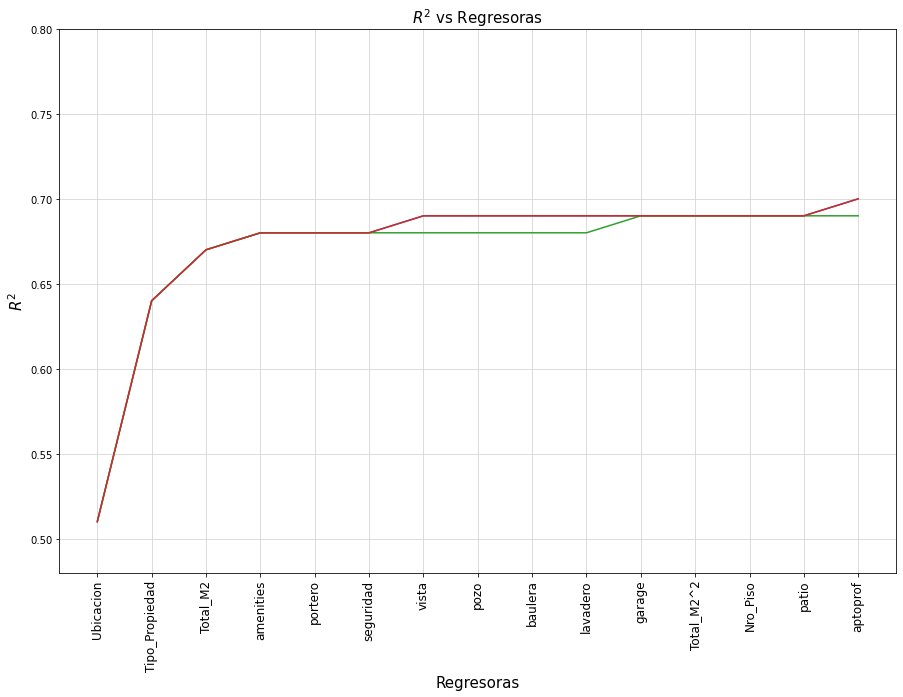

In [8]:
lm = linear_model.LinearRegression()
lm_elastic = linear_model.ElasticNetCV(normalize = True, cv = 4)
lm_ridgecv = linear_model.RidgeCV(normalize = True, cv = 4)
lm_lassocv = linear_model.LassoCV(normalize = True, cv = 4)

columnas_dummies = ['Ubicacion','Tipo_Propiedad']
modelos = [lm,lm_elastic,lm_ridgecv,lm_lassocv]
for modelo in modelos:
    dummies = [] 
    r2 = []
    mae = []
    for i in columnas_dummies:
        dummies.append(i)
        x = pd.get_dummies(data[dummies],drop_first=True) 
        y = data['Precio_M2']
        xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=49)
        model  = modelo.fit(xtrain,ytrain)
        ypred = modelo.predict(xtest)
        r2.append(round(modelo.score(xtrain,ytrain),2))
        mae.append(round(metrics.mean_absolute_error(ytest, ypred)))
        print(str(modelo),dummies)
        print('r2:',round(modelo.score(xtrain,ytrain),2))
        print ('MAE:', round(metrics.mean_absolute_error(ytest, ypred),0))
        print ('MSE:', round(metrics.mean_squared_error(ytest, ypred),0))
        print ('RMSE:', round(np.sqrt(metrics.mean_squared_error(ytest, ypred)),0))
        #print ('Alpha:',model.alpha_)

    columnas_df= ['Total_M2','amenities', 'portero', 'seguridad',  'vista', 'pozo', 
                  'baulera', 'lavadero','garage','Total_M2^2','Nro_Piso','patio','aptoprof']
    columnas = []
    for i in columnas_df:
        columnas.append(i)
        x= pd.concat([pd.get_dummies(data[dummies],drop_first=True),data[columnas]],axis = 1)
        xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=49)
        model  = modelo.fit(xtrain,ytrain)
        ypred = modelo.predict(xtest)
        r2.append(round(modelo.score(xtrain,ytrain),2))
        mae.append(round(metrics.mean_absolute_error(ytest, ypred)))
        print(str(modelo),dummies,'y',columnas)
        print('r2:',round(modelo.score(xtrain,ytrain),2))
        print ('MAE:', round(metrics.mean_absolute_error(ytest, ypred),2))
        print ('MSE:', round(metrics.mean_squared_error(ytest, ypred),2))
        print ('RMSE:', round(np.sqrt(metrics.mean_squared_error(ytest, ypred)),2))
        #print ('Alpha:',model.alpha_)

        

total = dummies + columnas
  





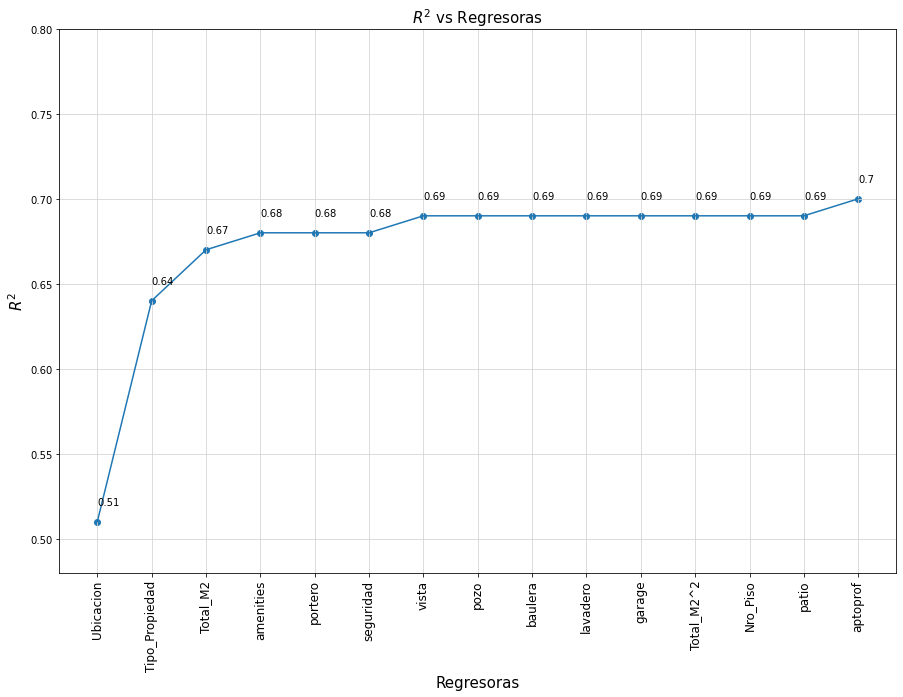

In [9]:
total = dummies + columnas
total


plt.figure(figsize = (15,10))
plt.xticks(rotation=90,fontsize = 12)
plt.xticks(fontsize = 12)
plt.plot(total,r2)
plt.grid(color = '#d4d4d4')
plt.scatter(total,r2)
plt.title(r'$R^2$ vs Regresoras', fontsize = 15)
plt.xlabel('Regresoras',fontsize = 15)
plt.ylabel(r'$R^2$',fontsize = 15)
plt.ylim(min(r2)-0.03, 0.8)

for total , r2_score in enumerate(r2):
    plt.text(total , np.array(r2_score)+0.01,str(r2_score))



In [105]:
plt.rcParams.update({'font.size': 12})

In [4]:
data_score = pd.DataFrame(index=['R2','MAE','MSE','RMSE','Alpha'], columns = ['LinearRegression','LassoCV','RidgeCV','ElasticNet'])
data_score

,LinearRegression,LassoCV,RidgeCV,ElasticNet
R2,NaN,NaN,NaN,NaN
MAE,NaN,NaN,NaN,NaN
MSE,NaN,NaN,NaN,NaN
RMSE,NaN,NaN,NaN,NaN
Alpha,NaN,NaN,NaN,NaN


In [19]:
#ENTRENAMIENTO



modelos_lineales = ['LinearRegression','LassoCV','RidgeCV','ElasticNet']
dummies = ['Ubicacion','Tipo_Propiedad']
columnas= ['Total_M2','amenities', 'portero', 'seguridad',  'vista', 'pozo', 'baulera', 'lavadero','garage','Total_M2^2','Nro_Piso','patio','aptoprof']



alphas = np.logspace(-5,0,600)
cv = 4
lm = linear_model.LinearRegression()
lm_lassocv = linear_model.LassoCV(alphas= alphas , normalize = True, cv = cv)
lm_ridgecv = linear_model.RidgeCV(alphas = alphas , normalize = True, cv = cv)
lm_elastic = linear_model.ElasticNetCV(alphas = alphas ,normalize = True, cv = cv)

modelos = [lm,lm_lassocv,lm_ridgecv,lm_elastic]
x= pd.concat([pd.get_dummies(data[dummies],drop_first=True),data[columnas]],axis = 1)
y = data['Precio_M2']
xtrain , xtest , ytrain , ytest = train_test_split(x,y,random_state=49)

for i , modelo in enumerate(modelos):
    if modelo == lm:
        modelo.fit(xtrain,ytrain)
        ypred = modelo.predict(xtrain)
        r2 = round(modelo.score(xtrain,ytrain),3)
        MAE = round(metrics.mean_absolute_error(ytrain, ypred),0)
        MSE = round(metrics.mean_squared_error(ytrain, ypred),0)
        RMSE = round(np.sqrt(metrics.mean_squared_error(ytrain, ypred)),0)
        alpha = 0
        data_score.loc[data_score.index,'LinearRegression'] = [r2,MAE,MSE,RMSE,alpha]
        train_dict = {modelos_lineales[i]:ypred}  
    else:
        modelo.fit(xtrain,ytrain)
        ypred = modelo.predict(xtrain)
        r2 = round(modelo.score(xtrain,ytrain),3)
        MAE = round(metrics.mean_absolute_error(ytrain, ypred),0)
        MSE = round(metrics.mean_squared_error(ytrain, ypred),0)
        RMSE = round(np.sqrt(metrics.mean_squared_error(ytrain, ypred)),0)
        alpha = modelo.alpha_
        data_score.loc[data_score.index,data_score.columns[i]] = [r2,MAE,MSE,RMSE,alpha]
        train_dict.update({modelos_lineales[i]:ypred})
     
        

In [94]:
#TESTEO
data_score_test = pd.DataFrame(index=['R2','MAE','MSE','RMSE','Alpha'], columns = ['LinearRegression','LassoCV','RidgeCV','ElasticNet'])
modelos_lineales = ['LinearRegression','LassoCV','RidgeCV','ElasticNet']

dummies = ['Ubicacion','Tipo_Propiedad']
columnas= ['Total_M2','amenities', 'portero', 'seguridad',  'vista', 'pozo', 'baulera', 'lavadero','garage','Total_M2^2','Nro_Piso','patio','aptoprof']



alphas = np.logspace(-5,0,600)
cv = 4
lm = linear_model.LinearRegression()
lm_elastic = linear_model.ElasticNetCV(alphas = alphas ,normalize = True, cv = cv)
lm_ridgecv = linear_model.RidgeCV(alphas = alphas , normalize = True, cv = cv)
lm_lassocv = linear_model.LassoCV(alphas= alphas , normalize = True, cv = cv)


modelos = [lm,lm_lassocv,lm_ridgecv,lm_elastic]
x= pd.concat([pd.get_dummies(data[dummies],drop_first=True),data[columnas]],axis = 1)
y = data['Precio_M2']
xtrain , xtest , ytrain , ytest = train_test_split(x,y,random_state=49)

for i , modelo in enumerate(modelos):
    if modelo == lm:
        modelo.fit(xtrain,ytrain)
        ypred = modelo.predict(xtest)
        r2 = round(modelo.score(xtest,ytest),3)
        MAE = round(metrics.mean_absolute_error(ytest, ypred),0)
        MSE = round(metrics.mean_squared_error(ytest, ypred),0)
        RMSE = round(np.sqrt(metrics.mean_squared_error(ytest, ypred)),0)
        alpha = 0
        data_score_test.loc[data_score.index,data_score.columns[i]] = [r2,MAE,MSE,RMSE,alpha]
        test_dict = {modelos_lineales[i]:ypred}  
    else:
        modelo.fit(xtrain,ytrain)
        ypred = modelo.predict(xtest)
        r2 = round(modelo.score(xtest,ytest),3)
        MAE = round(metrics.mean_absolute_error(ytest, ypred),0)
        MSE = round(metrics.mean_squared_error(ytest, ypred),0)
        RMSE = round(np.sqrt(metrics.mean_squared_error(ytest, ypred)),0)
        alpha = modelo.alpha_
        data_score_test.loc[data_score.index,data_score.columns[i]] = [r2,MAE,MSE,RMSE,alpha]
        test_dict.update({modelos_lineales[i]:ypred})
        

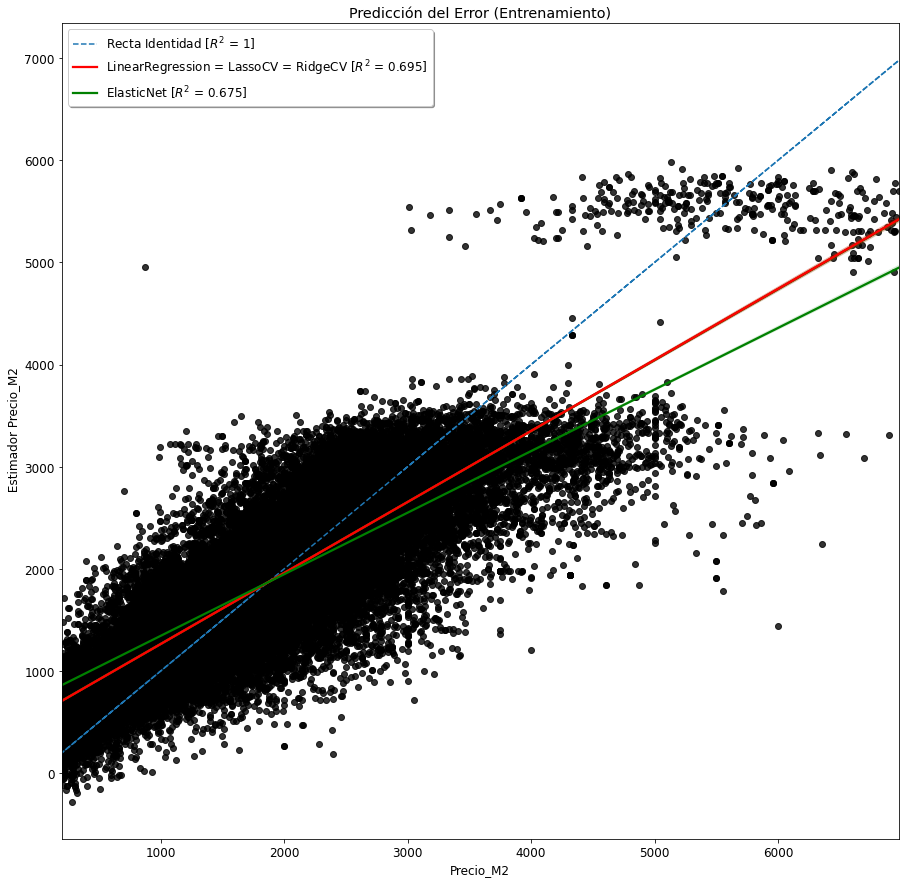

In [44]:
#PLOTEO DE LA PREDICCION DEL ERROR PARA LOS 4 MODELOS.

fig, (ax1) = plt.subplots(ncols=1,figsize=(15,15))

ax1.set_title('Predicción del Error (Entrenamiento)')

ax1.set(ylabel=' Estimador Precio_M2')
ax1.plot(ytrain,ytrain,linestyle='dashed')


    
sns.regplot(x=ytrain,y=train_dict['LinearRegression'],scatter_kws={"color": "black"}, line_kws={"color": "red"},ax=ax1)


sns.regplot(x=ytrain,y=train_dict['LassoCV'],scatter = False, line_kws={"color": "green"},ax=ax1)


sns.regplot(x=ytrain,y=train_dict['RidgeCV'],scatter = False, line_kws={"color": "red"},ax=ax1)


sns.regplot(x=ytrain,y=train_dict['ElasticNet'],scatter = False, line_kws={"color": "green"},ax=ax1)

plt.legend(('Recta Identidad: [$R^2$ = 1]', 'LinearRegression = LassoCV = RidgeCV: [$R^2$ = 0.695]'  ,'ElasticNet: [$R^2$ = 0.675]'), shadow=True)

In [98]:
residuals_LassoCv = ytrain - train_dict['LassoCV']
residuals_LinearRegression = ytrain - train_dict['LinearRegression']
residuals_RidgeCV = ytrain - train_dict['RidgeCV']
residuals_ElasticNet = ytrain - train_dict['ElasticNet']

test_residuals_LassoCv = ytest - test_dict['LassoCV']
test_residuals_LinearRegression = ytest - test_dict['LinearRegression']
test_residuals_RidgeCV = ytest - test_dict['RidgeCV']
test_residuals_ElasticNet = ytest - test_dict['ElasticNet']

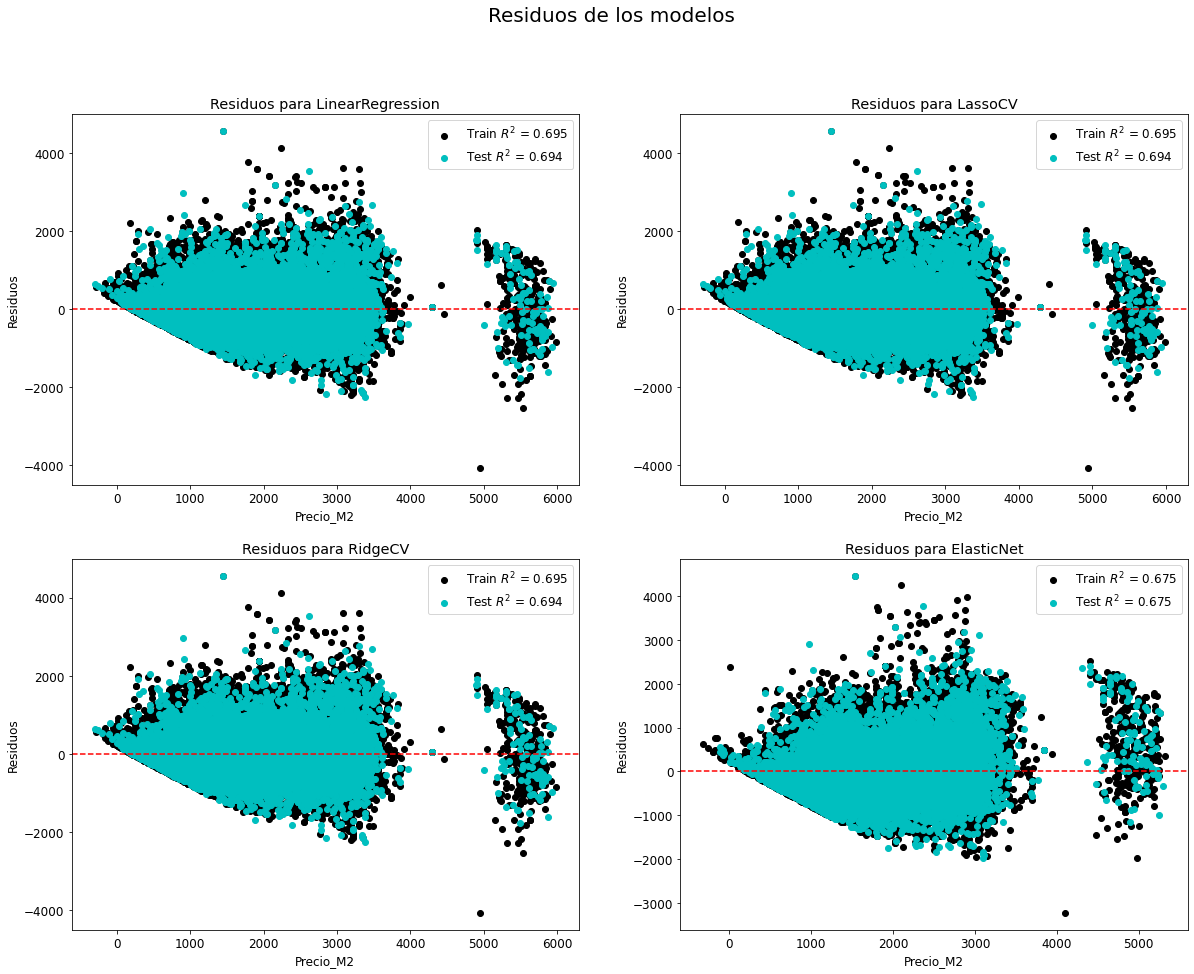

In [106]:
fig, (ax) = plt.subplots(2,2,figsize=(20,15))
fig.suptitle("Residuos de los modelos", fontsize=20)

ax[0][0].set_title('Residuos para LinearRegression')
ax[0][1].set_title('Residuos para LassoCV')
ax[1][0].set_title('Residuos para RidgeCV')
ax[1][1].set_title('Residuos para ElasticNet')


ax[0][0].scatter(x=train_dict['LinearRegression'],y=residuals_LinearRegression,color='black' , label = 'Train $R^2$ = 0.695')
ax[0][1].scatter(x=train_dict['LassoCV'],y=residuals_LassoCv,color='black',label = 'Train $R^2$ = 0.695')
ax[1][0].scatter(x=train_dict['RidgeCV'],y=residuals_RidgeCV,color='black',label = 'Train $R^2$ = 0.695')
ax[1][1].scatter(x=train_dict['ElasticNet'],y=residuals_ElasticNet,color='black',label = 'Train $R^2$ = 0.675')

ax[0][0].scatter(x=test_dict['LinearRegression'],y=test_residuals_LinearRegression,color='c' , label = 'Test $R^2$ = 0.694')
ax[0][1].scatter(x=test_dict['LassoCV'],y=test_residuals_LassoCv,color='c',label = 'Test $R^2$ = 0.694')
ax[1][0].scatter(x=test_dict['RidgeCV'],y=test_residuals_RidgeCV,color='c',label = 'Test $R^2$ = 0.694')
ax[1][1].scatter(x=test_dict['ElasticNet'],y=test_residuals_ElasticNet,color='c',label = 'Test $R^2$ = 0.675')






ax[0][0].axhline(y=0, color='r', linestyle='--')
ax[0][1].axhline(y=0,color='r', linestyle='--')
ax[1][0].axhline(y=0, color='r', linestyle='--')
ax[1][1].axhline(y=0, color='r', linestyle='--')

ax[0][0].set_xlabel('Precio_M2')
ax[0][1].set_xlabel('Precio_M2')
ax[1][0].set_xlabel('Precio_M2')
ax[1][1].set_xlabel('Precio_M2')


ax[0][0].set_ylabel('Residuos')
ax[0][1].set_ylabel('Residuos')
ax[1][0].set_ylabel('Residuos')
ax[1][1].set_ylabel('Residuos')




ax[0][0].legend(loc="upper right")
ax[0][1].legend(loc="upper right")
ax[1][0].legend(loc="upper right")
ax[1][1].legend(loc="upper right")


In [95]:
data_score_test

,LinearRegression,LassoCV,RidgeCV,ElasticNet
R2,0.694,0.694,0.694,0.675
MAE,383,383,383,394
MSE,263314,263294,263311,279146
RMSE,513,513,513,528
Alpha,0,0.000440968,7.52421e-05,1e-05


In [96]:
data_score

,LinearRegression,LassoCV,RidgeCV,ElasticNet
R2,0.695,0.695,0.695,0.675
MAE,380,380,380,393
MSE,261639,261658,261639,279285
RMSE,512,512,512,528
Alpha,0,0.000440968,7.52421e-05,1e-05


C:\Users\iory2\.conda\envs\dhdsblend\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AlphaSelection(ax=<AxesSubplot:title={'center':'RidgeCV'}, xlabel='Alpha', ylabel='MSE'>,
               model=None)

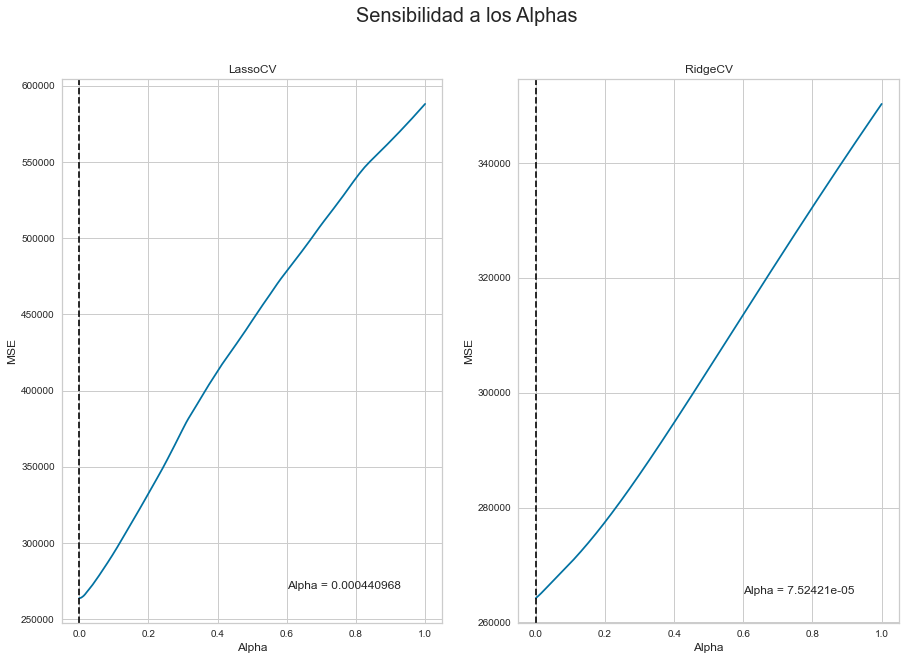

In [134]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import RidgeCV


fig, (ax) = plt.subplots(ncols=2,figsize=(15,10))
fig.suptitle("Sensibilidad a los Alphas", fontsize=20)
ax[0].set_title('LassoCV', fontsize=12)
ax[1].set_title('RidgeCV', fontsize=12)
ax[0].set_xlabel('Alpha', fontsize=12)
ax[1].set_xlabel('Alpha', fontsize=12)
ax[0].set_ylabel('MSE', fontsize=12)
ax[1].set_ylabel('MSE', fontsize=12)
ax[0].text(0.6,270000,'Alpha = 0.000440968')
ax[1].text(0.6,265000,'Alpha = 7.52421e-05')





alphas = np.logspace(-5, 0, 600)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas, normalize = True, cv =4)
visualizer = AlphaSelection(model,ax=ax[0])
visualizer.fit(xtrain, ytrain)

model = RidgeCV(alphas=alphas, normalize = True)
visualizer = AlphaSelection(model,ax=ax[1])
visualizer.fit(xtrain, ytrain)


